# Project: Ranking Hollywood's Leading Men:
## *--Comparing the film output, revenue, and ROI of movies from Nicolas Cage, Tom Cruise, and Brad Pitt between 1985 and 2015--*

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#examination">2. Data Examination</a></li>
<li><a href="#wrangling">3. Data Wrangling</a></li>   
<li><a href="#eda">4. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">5. Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

<a id='examination'></a>
## 2. Data Examination

> **Process**: As my first steps, I'll load and take a peak into the data with df.head(), df.describe(), and df.info() functions. With these functions can gauge the tidiness of the data and mentally prepare for what type of manipulation and cleaning I'll need to do. Here too I expanded my ideas for my analysis and adjusted my questions.

In [1312]:
# Import necessary packages and visualization libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset and print out a few lines

movies_raw=pd.read_csv("tmdb-movies.csv")
movies_raw.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,5,tt0113101,1.234890,4000000,4300000,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,NaN,Allison Anders|Alexandre Rockwell|Robert Rodri...,Twelve outrageous guests. Four scandalous requ...,...,It's Ted the Bellhop's first night on the job....,98,Comedy,Miramax Films|A Band Apart,12/25/95,293,6.4,1995,5723867,6153158
1,6,tt0107286,0.815631,0,12136938,Judgment Night,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|Je...,NaN,Stephen Hopkins,Don't move. Don't whisper. Don't even breathe.,...,"While racing to a boxing match, Frank, Mike, J...",110,Action|Thriller|Crime,Largo Entertainment|JVC Entertainment Networks,10/15/93,36,6.4,1993,0,18320343
2,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,39575591,2789712242


 > **Analysis**: First step of my analysis uses the movies.head() function. Here I can quickly confirm that the data set was read and formatted correctly from the csv file with the right separators. For the purposes of my questions, I'll mainly be looking at the "original_title", "cast", "release_year", "budget", and "revenue". Ideally, I'd be using the adjusted values as likely one actor will have is appearances skewed to an earlier time frame, but I discovered that much of the data in these columns are missing so I opted to use the "budget" and "revenue" columns. After I take a closer look at the dataset, I'll proceed to remove columns irrelevant to this project and various other data wrangling tasks. One potential issue that I'll have to address is the "cast" columns that contains multiple actors separated by a pipe character and grouping the "release_year". 

In [1313]:
#Perform operations to inspect data types and look for instances of missing or possibly errant data.

movies_raw.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10863.000000,10863.000000,1.086300e+04,1.086300e+04,10863.000000,10863.000000,10863.000000,10863.000000,1.086300e+04,1.086300e+04
mean,66050.111940,0.646457,1.465181e+07,3.987023e+07,102.070975,217.436159,5.975191,2001.323023,1.757798e+07,5.140307e+07
std,92116.330082,1.000308,3.091811e+07,1.170207e+08,31.385520,575.691262,0.935112,12.813462,3.431248e+07,1.446446e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10594.500000,0.207558,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20656.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75608.000000,0.713777,1.500000e+07,2.410305e+07,111.000000,146.000000,6.600000,2011.000000,2.093530e+07,3.380712e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Analysis**: After peaking into the dataset with the movies.head() call, we examined the statistical info of the ordinal data using movies.describe(). From here we can see that this dataset shows contains data on 10866 movies between 1960 to 2015. Ideally, I would've analyzed the data on a decade-level, but due to the limitations of the data set, I'll restructure the "release_year" column into three 10-year periods from 1985. In addition, since I only need data from 1985, I'll remove all rows that feature data pre-1985. There is some strange data in the "min" row showing many values with 0 that are not NaN. I'll take note of this and address it later if necessary.

In [1314]:
# Check the list of columns and their respective datatypes

movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10863 entries, 0 to 10862
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10863 non-null  int64  
 1   imdb_id               10853 non-null  object 
 2   popularity            10863 non-null  float64
 3   budget                10863 non-null  int64  
 4   revenue               10863 non-null  int64  
 5   original_title        10863 non-null  object 
 6   cast                  10787 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10819 non-null  object 
 9   tagline               8039 non-null   object 
 10  keywords              9370 non-null   object 
 11  overview              10859 non-null  object 
 12  runtime               10863 non-null  int64  
 13  genres                10840 non-null  object 
 14  production_companies  9833 non-null   object 
 15  release_date       

> **Analysis**: From the _**movies.info()**_ call, we can see a linear list of all the columns in the dataset and their respective data types. All 21 columns are not needed to answer my questions, so I will remove them in a later step. I opened the data in excel to do some quick manual input for some missing data, now that I've reloaded the csv file, several data times have turned from integers to floats. I will change that in the next section.


In [1315]:
# Check for null values

movies_raw.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7927
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **Analysis**: Although the _df.info()_ does show which columns have null values indirectly, the _df.isnull().sum()_ call lays things out much more clearer. From there though, the I can see that though there are null values, they appear entirely justifiable, often found in time-specific categories like "homepage" and "tagline" where a pre-internet age movie wouldn't have such data. The relevant columns look fairly clean, but I'll check them again after I've refined the scope of analysis.

<a id='wrangling'></a>
## 3. Data Wrangling

**Process**: I'll remove unnecessary columns (1) and rows (2), filter the rows to only display rows with the relevant actors (3), regroup the _release_year_ column into 10-year periods (4), check for null values (5), check for and remove any budget and revenue values with 0 entries (6), calculate the return on investment and create a column for it (7), create a cleaner "starring" column and drop the "cast" column (8), then finally summarize results (9).

In [1316]:
# (1) Remove uncessary columms and confirm results

movies_cleaning=movies_raw[["original_title", "cast","budget_adj","revenue_adj","release_year"]]
movies_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10863 entries, 0 to 10862
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  10863 non-null  object
 1   cast            10787 non-null  object
 2   budget_adj      10863 non-null  int64 
 3   revenue_adj     10863 non-null  int64 
 4   release_year    10863 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 424.5+ KB


In [1317]:
# (2) Remove unnecessary rows (release year prior to 1986) and confirm results

movies_cleaning=movies_cleaning[movies_cleaning['release_year'] >=1986]
movies_cleaning["release_year"].min()

1986

In [1318]:
# (3) Filter the rows to only display rows with the relevant actors

movies_cleaning=movies_cleaning.loc[movies_cleaning["cast"].str.contains("Nicolas Cage|Tom Cruise|Brad Pitt", na=False)]
movies_cleaning.head()

,original_title,cast,budget_adj,revenue_adj,release_year
23,Twelve Monkeys,Bruce Willis|Madeleine Stowe|Brad Pitt|Christo...,42213523,241604446,1995
32,War of the Worlds,Tom Cruise|Dakota Fanning|Miranda Otto|Justin ...,147386354,660714468,2005
53,Snatch,Jason Statham|Brad Pitt|Vinnie Jones|Dennis Fa...,12662921,105808674,2000
78,Ocean's Eleven,George Clooney|Brad Pitt|Matt Damon|Andy GarcÃ...,104676490,555052814,2001
80,Ocean's Twelve,George Clooney|Brad Pitt|Catherine Zeta-Jones|...,126988994,418768465,2004


In [1319]:
# (4) Group release_year into 10-year periods

bin_edges = [1985, 1995, 2005, 2015]
bin_names = ["1986-1995" ,"1996-2005" ,"2006-2015"]
movies_cleaning["period"] = pd.cut(movies_cleaning['release_year'], bin_edges, labels=bin_names)
movies_cleaning.head()

,original_title,cast,budget_adj,revenue_adj,release_year,period
23,Twelve Monkeys,Bruce Willis|Madeleine Stowe|Brad Pitt|Christo...,42213523,241604446,1995,1986-1995
32,War of the Worlds,Tom Cruise|Dakota Fanning|Miranda Otto|Justin ...,147386354,660714468,2005,1996-2005
53,Snatch,Jason Statham|Brad Pitt|Vinnie Jones|Dennis Fa...,12662921,105808674,2000,1996-2005
78,Ocean's Eleven,George Clooney|Brad Pitt|Matt Damon|Andy GarcÃ...,104676490,555052814,2001,1996-2005
80,Ocean's Twelve,George Clooney|Brad Pitt|Catherine Zeta-Jones|...,126988994,418768465,2004,1996-2005


In [1320]:
# (5) Recheck for null values

movies_cleaning.isnull().sum()

original_title    0
cast              0
budget_adj        0
revenue_adj       0
release_year      0
period            0
dtype: int64

In [1321]:
# (6) Repair or remove budgets and revenues of 0
# (6a) Check if there are any 0 budget entries

if movies_cleaning[movies_cleaning["budget_adj"] == 0].any().sum():
    print("Yes, there are some 0 budget entries! Fix it!")
else:
    print("No, there are no 0 budget entries! Next!")

Yes, there are some 0 budget entries! Fix it!


In [1322]:
# (6b) Identify 0 budget values
movies_cleaning[movies_cleaning['budget_adj'] ==0]

,original_title,cast,budget_adj,revenue_adj,release_year,period
5066,Space Station 3D,Tom Cruise|James Arnold|Michael J. Bloomfield|...,0,0,2002,1996-2005
6416,Stanley Kubrick: A Life in Pictures,Tom Cruise|Stanley Kubrick|Barbara Kroner|Stev...,0,0,2001,1996-2005
7920,The Audition,Leonardo DiCaprio|Brad Pitt|Robert De Niro|Mar...,0,0,2015,2006-2015
10799,Hitting the Apex,Brad Pitt|Valentino Rossi|Jorge Lorenzo|Casey ...,0,0,2015,2006-2015


> **Analysis**: After doing a quick Google search, I saw that "Hitting the Apex", "The Audition", "Stanley Kubrick: A Life in Pictures", and "Space Station 3D" were all either short films or documentaries. So these insignificant entries can be omitted, which I'll do next. Initially, other 0 budget entries existed but this was missing data budget data was available online and was easier fixed by directly editing  the csv file and reloading the project from the beginning. 

In [1308]:
# (6c) Remove all budget entries
movies_cleaning = movies_cleaning[movies_cleaning["budget_adj"] != 0]

# Reconfirm if there are any 0 budget entries
if movies_cleaning[movies_cleaning["budget_adj"] == 0].any().sum():
    print("Yes, there are some 0 budget entries! Fix it!")
else:
    print("No, there are no 0 budget entries! Next!")

No, there are no 0 budget entries! Next!


In [1267]:
movies_cleaning[movies_cleaning['budget_adj'] ==0]

,original_title,cast,budget_adj,revenue_adj,release_year,period


In [1310]:
# (6d) Check if there are any 0 revenue entries

if movies_cleaning[movies_cleaning["revenue_adj"] == 0].any().sum():
    print("Yes, there are some 0 revenue entries! Fix it!")
else:
    print("No, there are no 0 revenue entries! Next!")

No, there are no 0 revenue entries! Next!


In [1269]:
movies_cleaning[movies_cleaning["revenue_adj"] == 0].any().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of original_title    False
cast              False
budget_adj        False
revenue_adj       False
release_year      False
dtype: bool>

In [1233]:
# (7) Calculate the return on investment (ROI) as a percent and create a new column for it

initial=movies_cleaning["budget_adj"]
net=movies_cleaning["revenue_adj"]-movies_cleaning["budget_adj"]

movies_cleaning["ROI%"]=round(((net/initial)*100),2)
movies_cleaning.head()

,original_title,cast,budget_adj,revenue_adj,release_year,period,ROI%
23,Twelve Monkeys,Bruce Willis|Madeleine Stowe|Brad Pitt|Christo...,42213523,241604446,1995,1986-1995,472.34
32,War of the Worlds,Tom Cruise|Dakota Fanning|Miranda Otto|Justin ...,147386354,660714468,2005,1996-2005,348.29
53,Snatch,Jason Statham|Brad Pitt|Vinnie Jones|Dennis Fa...,12662921,105808674,2000,1996-2005,735.58
78,Ocean's Eleven,George Clooney|Brad Pitt|Matt Damon|Andy GarcÃ...,104676490,555052814,2001,1996-2005,430.26
80,Ocean's Twelve,George Clooney|Brad Pitt|Catherine Zeta-Jones|...,126988994,418768465,2004,1996-2005,229.77


In [1234]:
# (8) Create a cleaner "starring" column and drop the "cast" column
# (8a) Clean entry for Nicolas Cage by making separate dataframe

cage_movies=movies_cleaning.loc[movies_cleaning["cast"].str.contains("Nicolas Cage", na=False)]
cage_movies["starring"]="Nicolas Cage"
cage_movies.drop(columns="cast", inplace=True)
cage_movies.head()

,original_title,budget_adj,revenue_adj,release_year,period,ROI%,starring
186,Raising Arizona,11514483,55999305,1987,1986-1995,386.34,Nicolas Cage
218,Leaving Las Vegas,5151481,71262150,1995,1986-1995,1283.33,Nicolas Cage
233,Wild at Heart,15854536,24299575,1990,1986-1995,53.27,Nicolas Cage
385,Face/Off,108676826,333741296,1997,1996-2005,207.10,Nicolas Cage
409,City of Angels,73573251,265780177,1998,1996-2005,261.25,Nicolas Cage


In [1235]:
# (8b) Clean entry for Tom Cruise by making separate dataframe

cruise_movies=movies_cleaning.loc[movies_cleaning["cast"].str.contains("Tom Cruise", na=False)]
cruise_movies["starring"]="Tom Cruise"
cruise_movies.drop(columns="cast", inplace=True)
cruise_movies.head()

,original_title,budget_adj,revenue_adj,release_year,period,ROI%,starring
32,War of the Worlds,147386354,660714468,2005,1996-2005,348.29,Tom Cruise
93,Minority Report,123650662,434441663,2002,1996-2005,251.35,Tom Cruise
176,Magnolia,48434955,63425971,1999,1996-2005,30.95,Tom Cruise
181,Eyes Wide Shut,85088435,212185957,1999,1996-2005,149.37,Tom Cruise
188,Rain Man,46097276,654259434,1988,1986-1995,1319.30,Tom Cruise


In [1236]:
# (8c) Clean entry for Tom Cruise by making separate dataframe

pitt_movies=movies_cleaning.loc[movies_cleaning["cast"].str.contains("Brad Pitt", na=False)]
pitt_movies["starring"]="Brad Pitt"
pitt_movies.drop(columns="cast", inplace=True)
pitt_movies.head()

,original_title,budget_adj,revenue_adj,release_year,period,ROI%,starring
23,Twelve Monkeys,42213523,241604446,1995,1986-1995,472.34,Brad Pitt
53,Snatch,12662921,105808674,2000,1996-2005,735.58,Brad Pitt
78,Ocean's Eleven,104676490,555052814,2001,1996-2005,430.26,Brad Pitt
80,Ocean's Twelve,126988994,418768465,2004,1996-2005,229.77,Brad Pitt
153,A River Runs Through It,18648291,67507271,1992,1986-1995,262.00,Brad Pitt


In [1255]:
# (8d) Combine the three dataframes into one final dataframe
movies = pd.concat([cage_movies, cruise_movies, pitt_movies])
movies.sort_values(by=['release_year'],inplace=True)
movies.tail()

,original_title,budget_adj,revenue_adj,release_year,period,ROI%,starring
8960,Edge of Tomorrow,163954207,341302235,2014,2006-2015,108.17,Tom Cruise
10542,By the Sea,9199996,3068131,2015,2006-2015,-66.65,Brad Pitt
9302,Mission: Impossible - Rogue Nation,137999939,627743452,2015,2006-2015,354.89,Tom Cruise
10410,The Runner,5519998,128748,2015,2006-2015,-97.67,Nicolas Cage
10566,The Big Short,25759989,122678732,2015,2006-2015,376.24,Brad Pitt


In [1238]:
movies.describe()

,budget_adj,revenue_adj,release_year,ROI%
count,1.220000e+02,1.220000e+02,122.000000,122.000000
mean,6.742230e+07,2.007115e+08,2002.303279,197.759836
std,4.613902e+07,1.920028e+08,8.306016,315.589295
min,3.684364e+06,1.287480e+05,1986.000000,-97.670000
25%,2.974933e+07,4.049606e+07,1995.250000,6.555000
50%,5.612017e+07,1.505691e+08,2003.000000,140.010000
75%,1.014469e+08,3.204734e+08,2009.750000,271.140000
max,2.020279e+08,7.098811e+08,2015.000000,2278.870000


In [1254]:
# (9) Summarize 
raw=movies_raw.memory_usage(index=True).sum()
clean=movies.memory_usage(index=True).sum()

print("Summary\n\nDimensions of original data:\n",
      movies_raw.shape[0],"rows\n",
      movies_raw.shape[1],"columns\n"
      )
print("Dimensions of cleaned data:\n",
      movies.shape[0],"rows\n",
      movies.shape[1],"columns\n"
      )
print("Size of raw data: ", raw,"bytes\n",
     "Size of cleaned data: ",clean,"bytes\n",
     "Reduction in size: ", int(raw/clean*-1),"percent"
     )

Summary

Dimensions of original data:
 10863 rows
 21 columns

Dimensions of cleaned data:
 122 rows
 7 columns

Size of raw data:  1825112 bytes
 Size of cleaned data:  7086 bytes
 Reduction in size:  -257 percent


<a id='eda'></a>
## 4. Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Who had the highest movie output and movies output rate between 1985 and 2015?

In [1240]:
movies_stats=movies.groupby("period")["starring"].value_counts().unstack()
movies_stats

starring,Brad Pitt,Nicolas Cage,Tom Cruise
period,,,
1986-1995,8,13,10
1996-2005,14,16,10
2006-2015,15,26,10


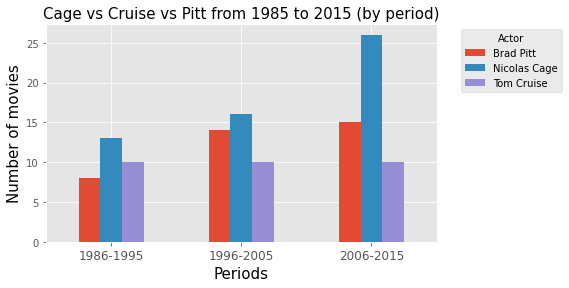

In [1241]:
# plot

plt.style.use("ggplot")
movies_stats.plot.bar(figsize=(7, 4))
plt.legend(title='Actor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Periods', fontsize=15, color="black")
plt.ylabel('Number of movies', fontsize=15, color="black")
plt.title("Cage vs Cruise vs Pitt from 1985 to 2015 (by period)", fontsize=15)
plt.xticks(fontsize=12, rotation=0)
plt.show()


In [1242]:
movie_stats_total=movies.groupby("period")["starring"].value_counts().unstack().sum()
movie_stats_total

starring
Brad Pitt       37
Nicolas Cage    55
Tom Cruise      30
dtype: int64

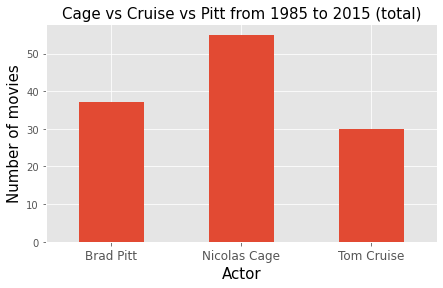

In [1243]:
plt.style.use("ggplot")
movie_stats_total.plot.bar(figsize=(7, 4))
plt.xlabel('Actor', fontsize=15, color="black")
plt.ylabel('Number of movies', fontsize=15, color="black")
plt.title("Cage vs Cruise vs Pitt from 1985 to 2015 (total)", fontsize=15)
plt.xticks(fontsize=12, rotation=0)
plt.show()

In [1244]:
movies.loc[movies['starring'] == "Brad Pitt"].sort_values(by=['revenue_adj'], ascending=False).head()

,original_title,budget_adj,revenue_adj,release_year,period,ROI%,starring
335,Troy,202027945,574232516,2004,1996-2005,184.23,Brad Pitt
78,Ocean's Eleven,104676490,555052814,2001,1996-2005,430.26,Brad Pitt
402,Mr. & Mrs. Smith,122821962,533948962,2005,1996-2005,334.73,Brad Pitt
8056,World War Z,187206671,497843379,2013,2006-2015,165.93,Brad Pitt
415,Se7en,47221907,468372425,1995,1986-1995,891.85,Brad Pitt


In [1246]:
movies.loc[movies['starring'] == "Tom Cruise"].sort_values(by=['revenue_adj'], ascending=False).head()

,original_title,budget_adj,revenue_adj,release_year,period,ROI%,starring
377,Top Gun,29841096,709881085,1986,1986-1995,2278.87,Tom Cruise
506,Mission: Impossible II,158286514,691886949,2000,1996-2005,337.11,Tom Cruise
7703,Mission: Impossible - Ghost Protocol,140562716,673453791,2011,2006-2015,379.11,Tom Cruise
32,War of the Worlds,147386354,660714468,2005,1996-2005,348.29,Tom Cruise
188,Rain Man,46097276,654259434,1988,1986-1995,1319.30,Tom Cruise


In [1248]:
movies.loc[movies['starring'] == "Nicolas Cage"].sort_values(by=['revenue_adj'], ascending=False).head()

,original_title,budget_adj,revenue_adj,release_year,period,ROI%,starring
7476,The Croods,126364503,547746994,2013,2006-2015,333.47,Nicolas Cage
1429,National Treasure: Book of Secrets,136716916,480994475,2007,2006-2015,251.82,Nicolas Cage
2225,The Rock,104266255,465809664,1996,1996-2005,346.75,Nicolas Cage
855,National Treasure,115444540,401114241,2004,1996-2005,247.45,Nicolas Cage
385,Face/Off,108676826,333741296,1997,1996-2005,207.10,Nicolas Cage


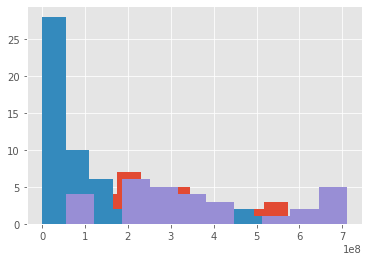

In [1251]:
movies.groupby("starring")["revenue_adj"].hist();

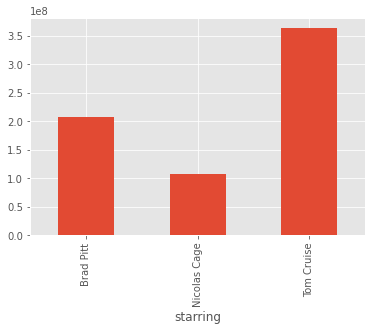

In [1250]:
movies.groupby("starring")["revenue_adj"].mean().plot(kind="bar");

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!